# <center><u>Face Recognition</u></center>

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Description
In this hands-on project, the goal is to build a face identification model to recognize faces.

## Dataset
Aligned Face Dataset from Pinterest
This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and aligned using dlib library.

# Objective
In this problem, we use a pre-trained model trained on Face recognition to
recognize similar faces. Here, we are particularly interested in recognizing whether two given faces are of the same person or not.

### Analysis By:
Soumalya Biswas (Group-3)

# =============================================================

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [3]:
import tensorflow
tensorflow.__version__

'2.2.0-rc1'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change current working directory to project folder (1 mark)

In [0]:
import os
project_path = "/content/drive/My Drive/Colab Notebooks/FACE_RECOGNIZATION/"
os.chdir(project_path)

### Extract the zip file (5 Marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
from zipfile import ZipFile

In [0]:
with ZipFile(project_path+'Aligned Face Dataset from Pinterest.zip', 'r') as z:
  z.extractall()

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [7]:
metadata

array([PINS/pins_Aaron Paul/Aaron Paul0_262.jpg,
       PINS/pins_Aaron Paul/Aaron Paul101_247.jpg,
       PINS/pins_Aaron Paul/Aaron Paul101_248.jpg, ...,
       PINS/pins_zendaya/zendaya97.jpg, PINS/pins_zendaya/zendaya98.jpg,
       PINS/pins_zendaya/zendaya99.jpg], dtype=object)

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (5 Marks)
- Load one image using the function "load_image"

In [9]:
# Total Image count 
print("Total images: ", len(metadata))

Total images:  10770


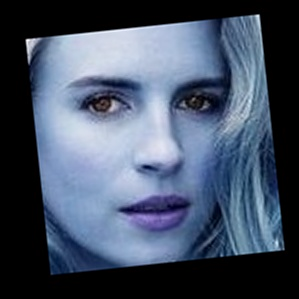

In [10]:
from google.colab.patches import cv2_imshow
n = 860
image_path = metadata[n].image_path()
img = load_image(image_path)
cv2_imshow(img)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (5 Marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
# Loading Model weights
model = vgg_face()

# Loading Model weights
WEIGHTS_FILE = 'vgg_face_weights.h5'
model.load_weights(WEIGHTS_FILE)

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [14]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [15]:
embedding_vector

array([ 0.03170307, -0.0150513 , -0.01243402, ...,  0.00043141,
        0.00219081, -0.00908097], dtype=float32)

### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [187]:
import time

embeddings = np.zeros((metadata.shape[0], 2622))
start_time = time.time()
for i, metas in enumerate(metadata):
  # if i == 300:
  #   break
  img_path = metas.image_path()
  img = load_image(img_path)
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224,224))
  embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

computational_time = time.time() - start_time
print('Done in %0.3fs' %(computational_time))

embeddings[0]

Done in 3512.270s


array([ 0.03170307, -0.0150513 , -0.01243402, ...,  0.00043141,
        0.00219081, -0.00908097])

In [189]:
embeddings[299]

array([ 0.02415167, -0.00999339,  0.01722975, ..., -0.01328373,
       -0.01766202,  0.00688194])

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

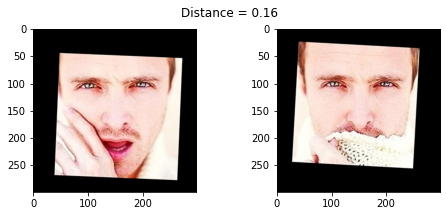

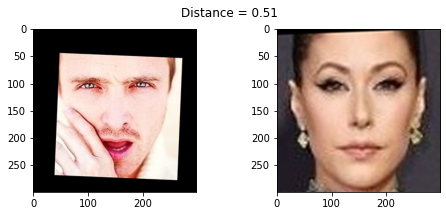

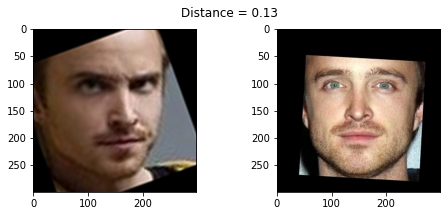

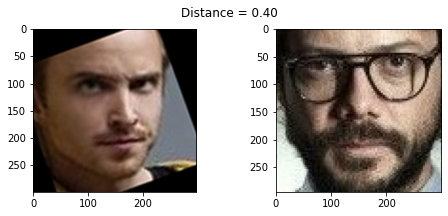

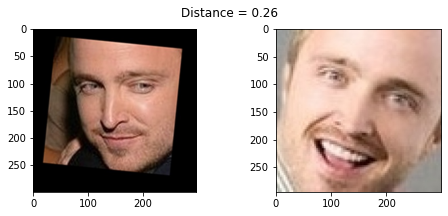

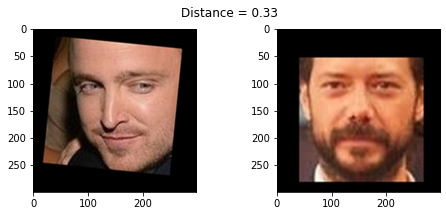

In [191]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

X_train = embeddings[train_idx]
X_test = embeddings[test_idx]

### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
targets = np.array([m.name for m in metadata])

In [0]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(targets) 

In [0]:
y_train = y[train_idx]
y_test  = y[test_idx]

In [196]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

### Standardize the feature values (5 marks)
- Scale the features using StandardScaler

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Reduce dimensions using PCA (5 Marks)
- Reduce feature dimensions using Principal Component Analysis

In [256]:
from sklearn.decomposition import PCA

covMatrix = np.cov(X_train_scaled,rowvar=False)
print(covMatrix)

[[ 1.00010447  0.12209438  0.10943082 ...  0.07828397 -0.11821722
  -0.25862536]
 [ 0.12209438  1.00010447  0.23570263 ... -0.04199468  0.28210931
   0.21652593]
 [ 0.10943082  0.23570263  1.00010447 ... -0.1097791   0.07300247
   0.03848684]
 ...
 [ 0.07828397 -0.04199468 -0.1097791  ...  1.00010447 -0.02320233
  -0.09532257]
 [-0.11821722  0.28210931  0.07300247 ... -0.02320233  1.00010447
   0.39700603]
 [-0.25862536  0.21652593  0.03848684 ... -0.09532257  0.39700603
   1.00010447]]


In [0]:
features=2262

In [258]:
# Taking the attribute count 2622 except the target column.
pca = PCA(n_components=features, svd_solver='full')
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=2262, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [259]:
print("Eigen Values :")
print("====================")
print(pca.explained_variance_)

Eigen Values :
[3.56338366e+02 1.41550231e+02 1.04638687e+02 ... 2.11263675e-03
 2.09621719e-03 2.09183212e-03]


In [260]:
print("Eigen Vectors :")
print("====================")
print(pca.components_)

Eigen Vectors :
[[-0.02388544  0.00878054 -0.00319174 ... -0.00837999  0.02122475
   0.03895635]
 [ 0.02032321 -0.0003937   0.00886593 ... -0.02367189 -0.00379414
   0.01102859]
 [ 0.00133301  0.00062341 -0.00652291 ...  0.01098933 -0.00112374
  -0.01615651]
 ...
 [-0.01056155 -0.00775345 -0.01692618 ...  0.02440818 -0.00697853
  -0.01451472]
 [ 0.021602   -0.0049083   0.00073498 ...  0.02907454  0.00172627
   0.0146214 ]
 [-0.00461219 -0.01835867 -0.0052798  ...  0.03919705 -0.01227483
   0.00243808]]


In [261]:
print("The percentage of variation explained by each eigen Vector : ")
print("============================================================")
print(pca.explained_variance_ratio_)

The percentage of variation explained by each eigen Vector : 
[1.35889070e-01 5.39799561e-02 3.99037971e-02 ... 8.05650672e-07
 7.99389098e-07 7.97716859e-07]


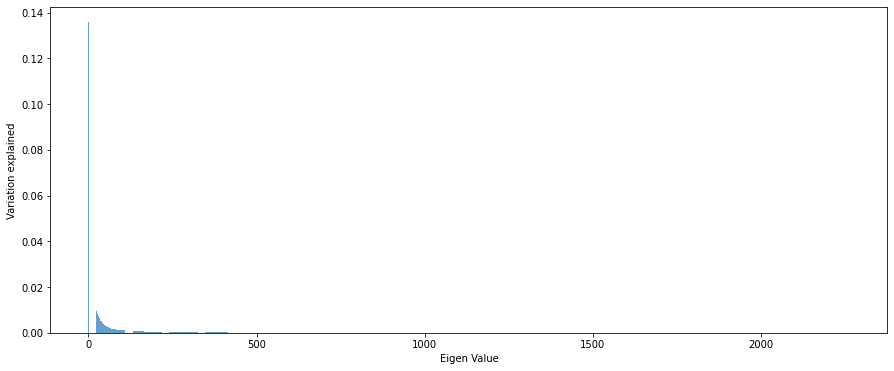

In [262]:
fig1 = plt.figure(figsize=(15,6))
plt.bar(list(range(1,(features+1))),pca.explained_variance_ratio_,alpha=0.7)
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.show()

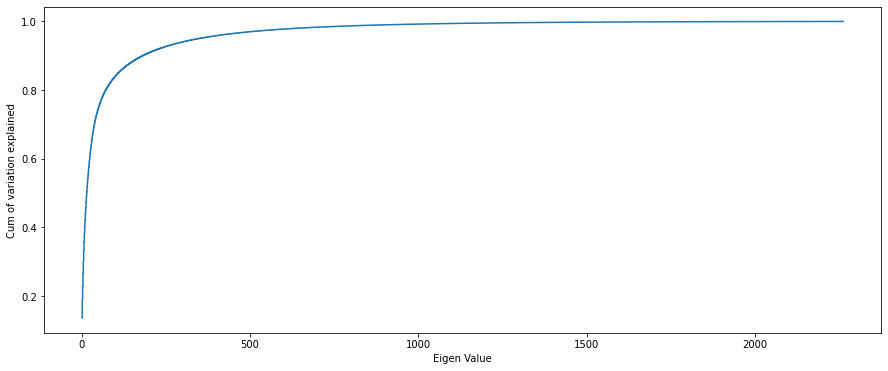

In [263]:
fig1 = plt.figure(figsize=(15,6))
plt.step(list(range(1,(features+1))),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen Value')
plt.show()

Text(0.5, 1.0, 'Selecting dimension with the Elbow Method')

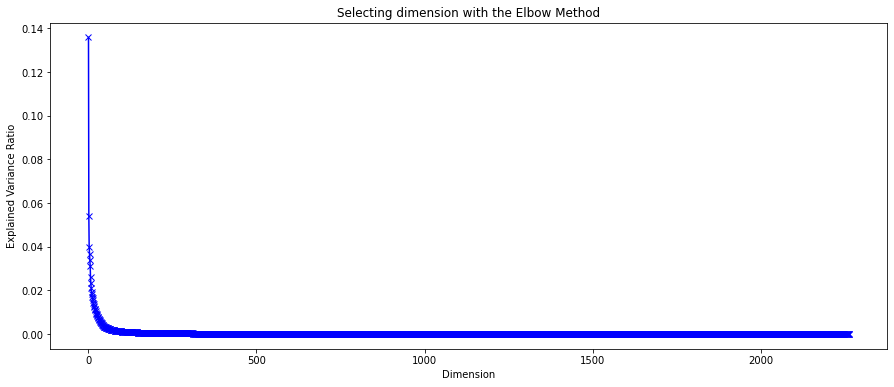

In [264]:
fig1 = plt.figure(figsize=(15,6))
plt.plot(list(range(1,(features+1))), pca.explained_variance_ratio_, 'bx-')
plt.xlabel('Dimension')
plt.ylabel('Explained Variance Ratio')
plt.title('Selecting dimension with the Elbow Method')

In [273]:
# Set variable for the decided dimension
final_n_component = 200
# Taking the attribute count as per the decision.
pca_200_component = PCA(n_components=final_n_component, svd_solver='full')
pca_200_component.fit(X_train_scaled)
print(f"Eigen Values (with {final_n_component} PCA components):")
print("===========================================")
print(pca_200_component.explained_variance_)
print(f"Eigen Vectors (with {final_n_component} PCA components):")
print("=================================================")
print(pca_200_component.components_)
print(f"The percentage of variation explained by each eigen Vector (with {final_n_component} PCA components):")
print("==========================================================================================")
print(pca_200_component.explained_variance_ratio_)
# Transforming the dataset
pca_X_set = pca_200_component.transform(X_train_scaled)
pca_X_test_set = pca_200_component.transform(X_test_scaled)

Eigen Values (with 200 PCA components):
[356.33836552 141.55023127 104.63868662  96.63277552  89.17777103
  82.0785248   67.95911747  61.23037863  55.13671904  50.94871356
  47.69229461  44.60711358  43.47557133  40.96230346  37.10142342
  35.75282793  34.19304034  32.19461589  30.29338663  29.75030613
  28.64960474  27.67529097  25.21025528  24.56349533  23.98668344
  23.15696868  21.86929475  20.14980447  19.94108241  19.3135565
  18.35399027  17.4259422   16.61154512  16.26908915  15.00313171
  14.03317244  13.87300548  13.42445877  13.26808886  12.65131419
  11.49760114  11.38657479  10.3440958   10.32410374   9.71005905
   9.34725364   8.93454203   8.77049181   8.61116922   8.38559487
   8.21231916   8.06700031   7.61600606   7.40900789   7.31879817
   7.16653526   7.0439759    6.85417348   6.65781719   6.51367574
   6.22166776   6.08034721   5.90251044   5.69221472   5.53040096
   5.3957099    5.25062135   5.10429132   4.92428573   4.84769265
   4.78777753   4.6944147    4.574217

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [0]:
svm_clf = SVC(C = 0.01, kernel = 'linear', gamma= "scale")

In [269]:
svm_clf.fit(pca_X_set , y_train)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [270]:
svm_clf.score(pca_X_test_set, y_test)

0.9548872180451128

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

In [271]:
metadata[test_idx][example_idx].image_path()

'PINS/pins_Alvaro Morte/Alvaro Morte111_820.jpg'

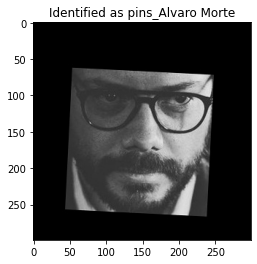

In [272]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())

example_prediction = clf.predict([pca_X_test_set[example_idx]])
example_identity = label_encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

<b>Image identified as Alvaro Morte which a correct prediction by my model.</b>